# NLP Project
- We would utilize data from GitHub README files to analyze and predict programming language based on the content.


# Project Goal:
- The goal is to analyze and develop a model capable of predicting the primary programming language of a repository based on its content and structure. This will enable efficient categorization and organization of code repositories, aiding developers in discovering relevant projects and facilitating collaboration within the programming community.

In [1]:
import pandas as pd
import numpy as np
import time

#see the data
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

#play with words
import nltk.sentiment
import nltk
import re
from pprint import pprint

#split and model
from scipy.stats import f_oneway
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import ToktokTokenizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#import 
from sklearn.feature_extraction.text import CountVectorizer

#sql creds
import env as e
import acquire as a
import wrangle as w
import explore as ex

#scraping
import requests
from bs4 import BeautifulSoup

import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# Data Dictionary:
![Alt text](https://github.com/Chellyandy/nlp-project/blob/main/data%20dictionary.png)

# Initial Thoughts/Questions:
1. Are there any significant differences in the word frequencies between README files of different programming languages?
2. Does the presence of specific libraries in the README file correlate with the programming language used?
3. What are the most common words throughout the data frame and  per each language?
4. What are the least common words throughout the data frame and  per each language?
5. Is message length significant in identifying language category?

# Wrangle
- Acquire:
    - Acquired the data from github.com by extracting the ["Most Forked Repositories"]([https://www.kaggle.com/datasets/meirnizri/covid19-dataset](https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories))
    - Data was collected as of June 27, 2023.
    - Data was scraped and a JSON file was created (data2.json).
    - Data Contains 180 repositories.
- Prepare:
  - Removed non-ASCII characters and converted all characters to lowercase.
  - Removed stopwords, tokenized, and lemmatized rows.
  - Created a new column with cleaned and lemmatized README content.
  - Created a bucket named 'other' to include all other languages that are not JavaScript, Python,Java, TypeScript, or     HTML.
  - Deleted extra words that were not relevant to the project
  - Split the data into train, validation, and test sets for exploration.

In [2]:
# Use wrangle function to acquire and prepare data
df = w.nlp_wrangle()
df.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,0.9371,491,65
1,github/gitignore,Other,# A collection of `.gitignore` templates\n\nTh...,collection gitignore template collection giti...,0.9991,4526,610
2,Pierian-Data/Complete-Python-3-Bootcamp,Other,# Complete-Python-3-Bootcamp\nCourse Files for...,plete python bootcamp course file plete pytho...,0.4404,163,23
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p align center href getbootstrap img src ge...,0.9943,9366,1288
4,rdpeng/ExData_Plotting1,Other,## Introduction\n\nThis assignment uses data f...,introduction assignment us data href archive ...,0.9903,2891,436


# Exploration
- Created visualizations and answered the following questions:
1. Are there any significant differences in the word frequencies between README files of different programming             languages?
2. Does the presence of specific libraries in the README file correlate with the programming language used?
3. What are the most common words throughout the data frame and  per each language?
4. What are the least common words throughout the data frame and  per each language?
5. Is message length significant in identifying language category?

### Establish baseline accuracy

In [3]:
# Divide mode(Other) by total
82/174

0.47126436781609193

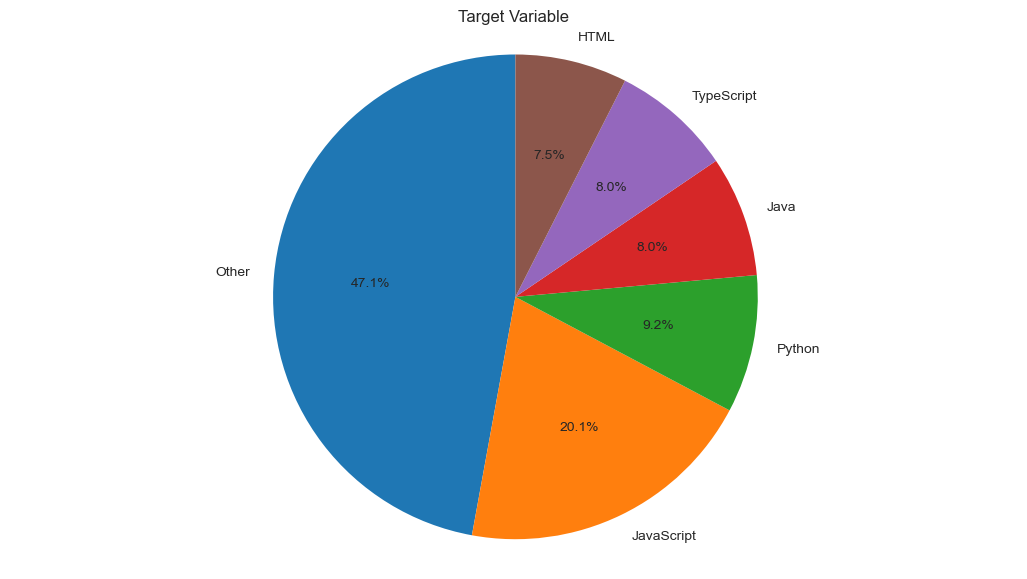

In [4]:
# Visualize Target
ex.create_pie_chart(df,'language','Target Variable')

- Split data into train, validate and test

In [5]:
# Split data into train, validate and test using function
train, validate, test = ex.split_data(df, 'language')


## 1.Are there any significant differences in the word frequencies between README files of different programming languages?

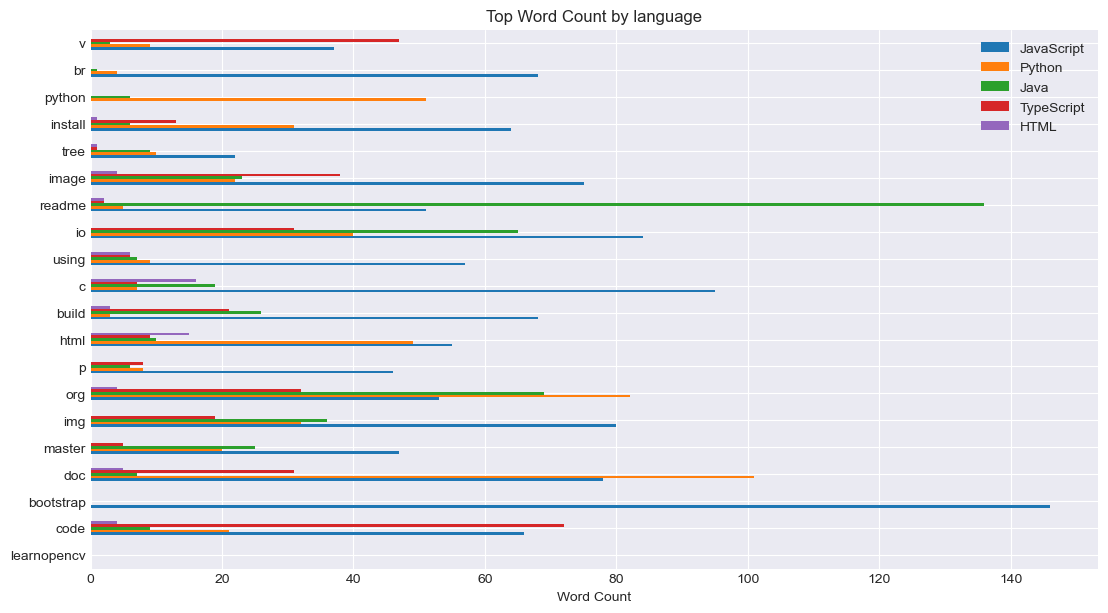

,JavaScript,Python,Java,TypeScript,HTML,Other,All
j,165,3,2,12,2,20,204
bootstrap,146,0,0,0,0,340,486
c,95,7,19,7,16,220,364
next,86,2,2,63,1,7,161
project,86,9,20,34,14,74,237


In [6]:
# Run function that runs the code for Question #1.
ex.question_1(train)

- Javascript contains j, bootstrap, project and next significantly more than other language categories. 
- Python contains 0 and doc significantly more than other language categories.
- Java contains md significantly more than other language categories. 
- TypeScript and Javascript use the word code significantly more than other language categories.
- HTML seems to share most words with other language categories.

# 2. Does the presence of specific libraries in the README file correlate with the programming language used? ie. Pandas, dubbo, nbsp

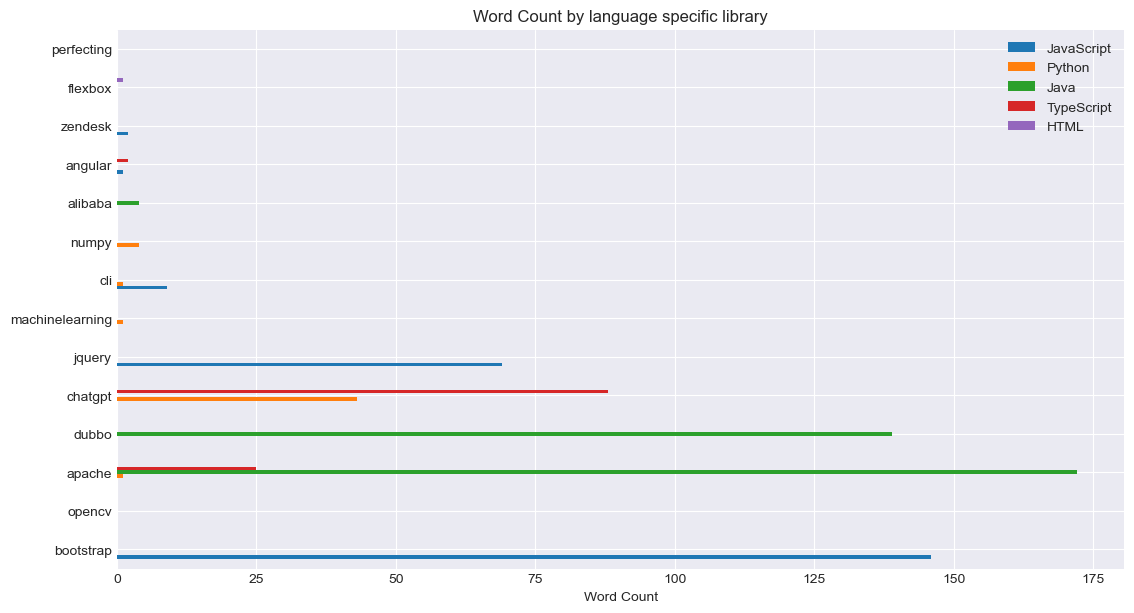

,JavaScript,Python,Java,TypeScript,HTML,Other,All,tools_frameworks
j,165,3,2,12,2,20,204,0
bootstrap,146,0,0,0,0,340,486,486
c,95,7,19,7,16,220,364,0
next,86,2,2,63,1,7,161,0
project,86,9,20,34,14,74,237,0


In [7]:
# Run function that runs code for Question #2
ex.question_2(train)

- Java uses dubbo and apache more than the rest of the languages
- JavaScript uses bootstrap and jquery more than the rest of the languages
- TypeScript uses chatgpt more than the other languages

# 3. Most Common words on entire df and/or each language


In [8]:
# Run function that runs code for Question #3.
ex.question_3(train)

JavaScript              j
Python              panda
Java               apache
TypeScript        chatgpt
HTML                 file
Other         learnopencv
All           learnopencv
Total         learnopencv
dtype: object


# 4. Least common words used on entire df and/or each language

In [9]:
# Run function that runs code for Question #4.
ex.question_4(train)

JavaScript        panda
Python        bootstrap
Java          bootstrap
TypeScript    bootstrap
HTML          bootstrap
Other              gulp
All             generic
Total           generic
dtype: object


# 5. Is word count significant in identifying language category?

## Stats Test

$H_{0}$ : There is no difference in word count as they apply to language category

$H_{a}$ : There is a difference in word count as they apply to language category

F-value: 0.7584699880034976
p-value: 0.5819111925535887


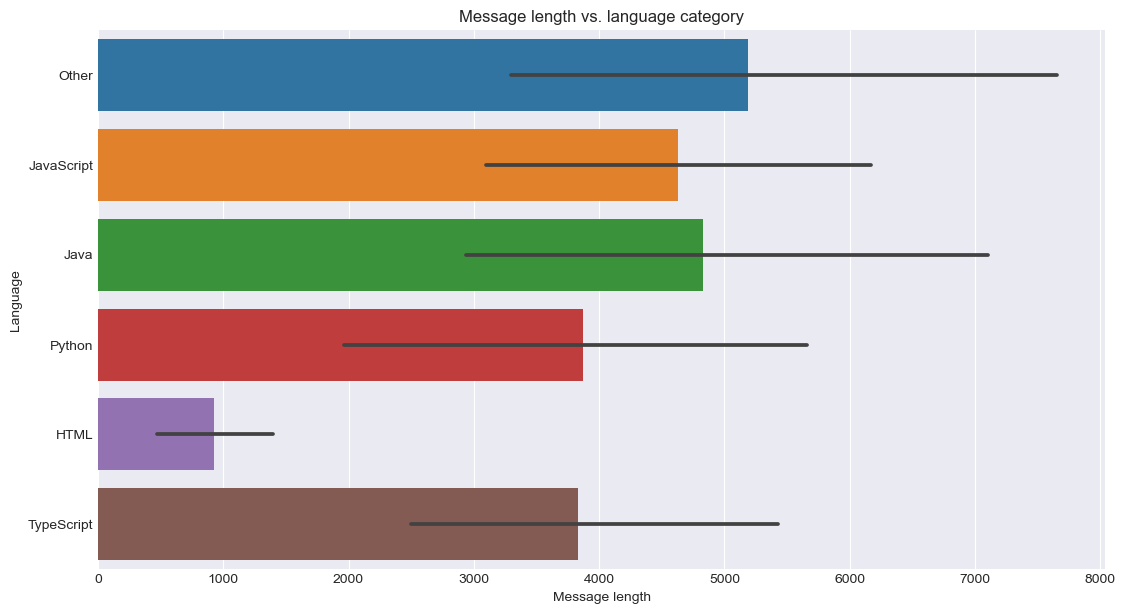

In [10]:
# Run function that visualizes message length vs. language category. 
# The code also prepares variables for and runs ANOVA stats test and prints out the f and p values
# Alpha is set to 0.05
ex.stats_ANOVA_viz(train)

-  The p-value of the ANOVA test is greater than alpha so we can infer that the word count doesn't identify language category. Therefore, we fail to reject the null hypothesis.

# Word Clouds

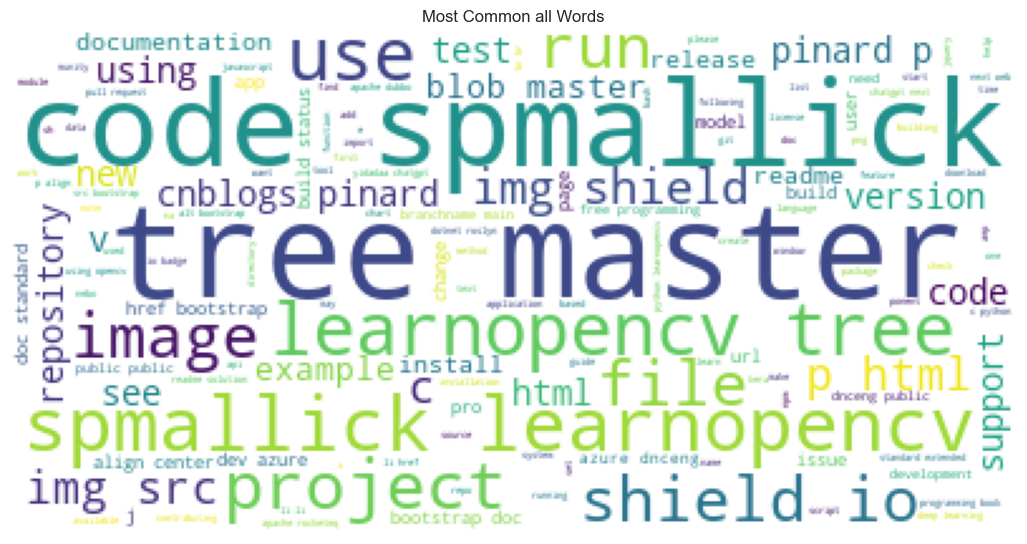

In [11]:
# Run function for word cloud
ex.word_cloud_all(train)

# Sentiment analysis

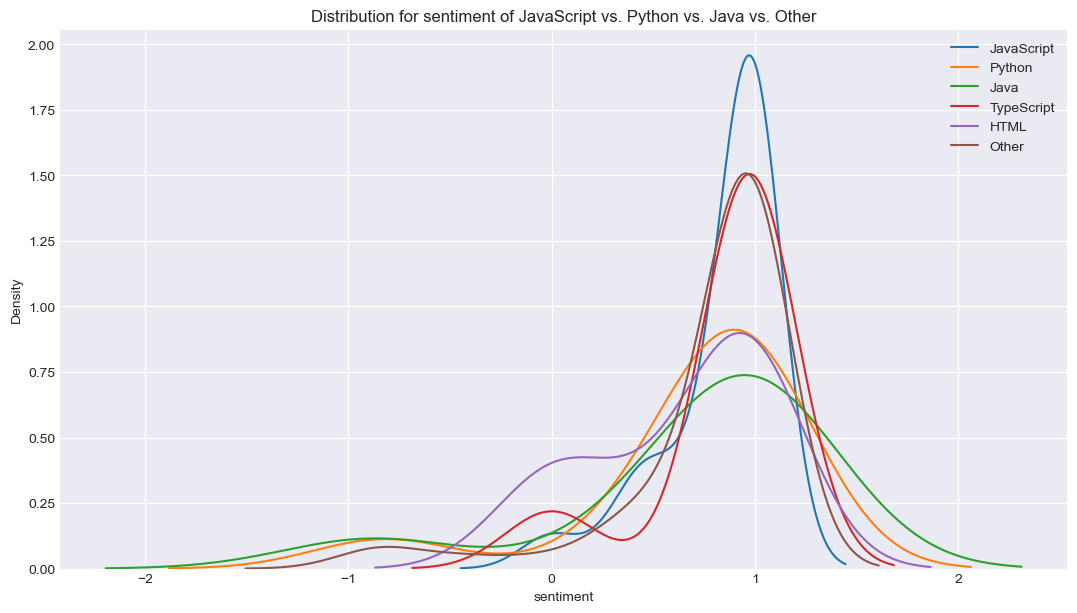

,mean,median
language,,
HTML,0.649487,0.92355
Java,0.689600,0.99135
JavaScript,0.836390,0.99080
Other,0.773155,0.97760
Python,0.695150,0.91865
TypeScript,0.851513,0.98315


In [12]:
# Run function for sentiment analysis and print figures and graph
ex.sentiment(train)

# Modeling
- split data into X_train, X_validate, X_test, y_train, y_validate, y_test
    - make 'bag of words' for modeling

# Summary/Takeaways:

# Key Findings, Recommendations, and Next Steps: